# Project 1: The College Student Dilemma

## Introducing the problem

There’s a belief that states college students can only choose two out of the following three: a social life, good grades, and adequate sleep. This can be accredited to numerous factors such as a rigorous course load, student employment, extracurriculars, bad time management, etc. In this project, I will be exploring if students attending Duke University suffer from this dilemma or if they manage to find a balance between the three. Some questions I am planning to answer are:

- How does a social life affect academic performance?

- How does sleep affect academic performance?

- Can Duke students have all 3 of the following: A social life, good grades, and an adequate amount of sleep.


## Introducing the data

In [147]:
import pandas as pd
import math

In [148]:
df = pd.read_csv('gpa.csv')

In [149]:
df.head()

,gpa,studyweek,sleepnight,out,gender
0,3.89,50,6.0,3.0,female
1,3.90,15,6.0,1.0,female
2,3.75,15,7.0,1.0,female
3,3.60,10,6.0,4.0,male
4,4.00,25,7.0,3.0,female


I found the dataset on [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/duke-students-gpa) but the original can be found on [OpenIntro](https://www.openintro.org/data/index.php?data=gpa). The data set includes information from a survey conducted at Duke. This survey asked 55 students their GPA, the number of hours they study per week, how many hours they sleep per night, how often they go out per week, and their gender.

## Pre-processing

In [150]:
df.isnull().sum()

gpa           0
studyweek     0
sleepnight    0
out           0
gender        0
dtype: int64

Upon first inspection, I started off by checking the data for any null values, luckily there were none. 


In [151]:
df = df.drop('gender', axis = 1)

I proceeded to drop the gender column as it won’t have any effect on the questions I'm hoping to answer.

In [152]:
df = df.rename(columns={'studyweek':'hours_of_study_per_week',
                        'sleepnight':'sleep_per_night',
                        'out':'nights_out_per_week'})

Next, I decided to change each column name to something a bit more descriptive.

In [153]:
df['nights_out_per_week'] = df['nights_out_per_week'].apply(lambda x: math.floor(x))

Then, I rounded the nights out per week values down because it doesn't make sense to go out half a night per week, to me at least.

In [154]:
df.head()

,gpa,hours_of_study_per_week,sleep_per_night,nights_out_per_week
0,3.89,50,6.0,3
1,3.90,15,6.0,1
2,3.75,15,7.0,1
3,3.60,10,6.0,4
4,4.00,25,7.0,3


 Due to the small sample size of the dataset and no null values, there wasn’t much pre-processing to do.

## Data Visualization

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
%matplotlib inline

Text(0.5, 1.0, 'Distribution of GPA vs. Weekly Study Hours')

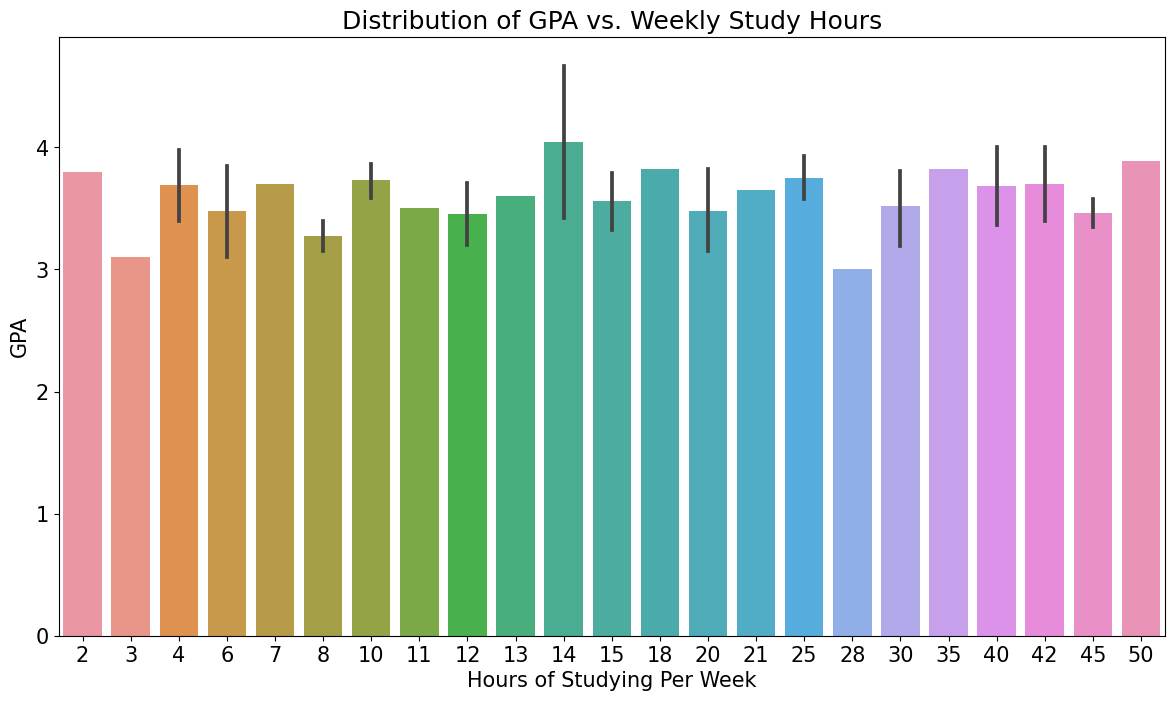

In [156]:
plt.figure(figsize=(12, 7))
plt.rcParams.update({'font.size': 15})
sns.barplot(data=df, x='hours_of_study_per_week', y='gpa')
plt.tight_layout()
plt.xlabel('Hours of Studying Per Week')
plt.ylabel('GPA')
plt.title('Distribution of GPA vs. Weekly Study Hours')

First, I wanted to see the distribution between GPA and weekly study hours. This bar plot shows the average GPA over the distribution of hours of studying per week. The highest average GPA is associated with 14 hours of studying per week, but the larger error bar for this specific value indicates that there is more variability compared to the rest of the hourly values.

Text(0.5, 1.0, 'Heatmap Analysis: Student Behaviors and Academic Performance')

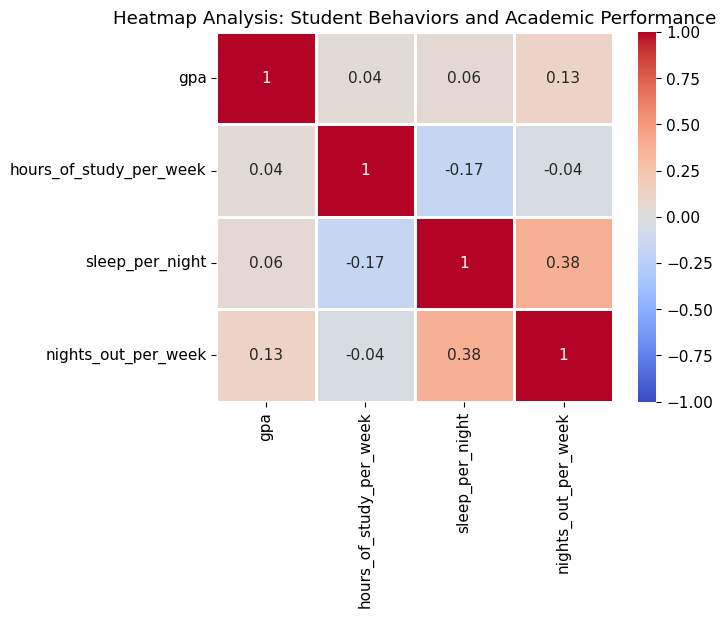

In [157]:
plt.rcParams.update({'font.size': 11})
sns.heatmap(df.corr().round(2), annot=True,linewidth=1, vmin= -1, vmax=1, cmap='coolwarm')
plt.title('Heatmap Analysis: Student Behaviors and Academic Performance')

This heatmap illustrates the correlations between the features. A value closer to 1 indicates a stronger positive linear correlation between the two features, while a value closer to -1 indicates a stronger negative linear correlation.

 It was surprising to observe the strongest positive correlation between two features: sleep per night and nights out per week. One might expect that going out more frequently would result in less sleep, but this correlation suggests the opposite.

Observing the correlation between hours of study per week and GPA was also intriguing. The data suggests a very weak positive correlation of 0.04 between the two, making it the joint weakest correlation among the group.

### Social Habits

Text(0.5, 1.0, ' Distribution of Students Weekly Nights out')

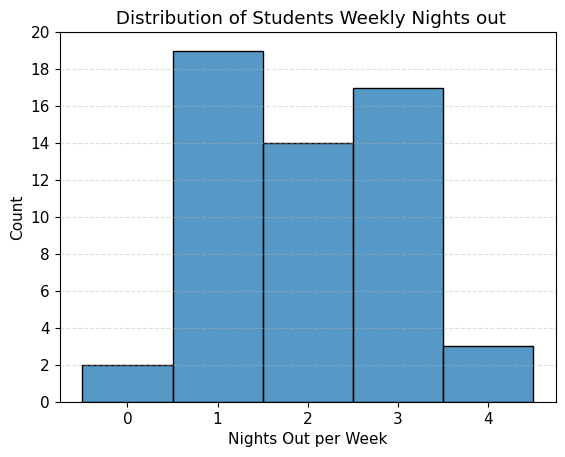

In [158]:
sns.histplot(data = df, x='nights_out_per_week', bins=range(0,6))
custom_xticks = [0.5 + i for i in range(5)]
plt.xticks(custom_xticks,range(5))
plt.yticks(range(0, 22, 2))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xlabel('Nights Out per Week')
plt.title(' Distribution of Students Weekly Nights out')

Beginning the exploration of students' weekly nights out, it's evident that the majority engage in some level of social activity. Out of the 55 students surveyed, only two abstain from going out entirely. The most common frequency is once a week, with approximately 19 students following this pattern. Interestingly, 34 students go out at least twice a week, showing that this data set as a whole is quite social.

Now, let's see how these social habits affect GPA, if at all.

Text(0.5, 1.0, 'Understanding GPA Changes with Nights Out')

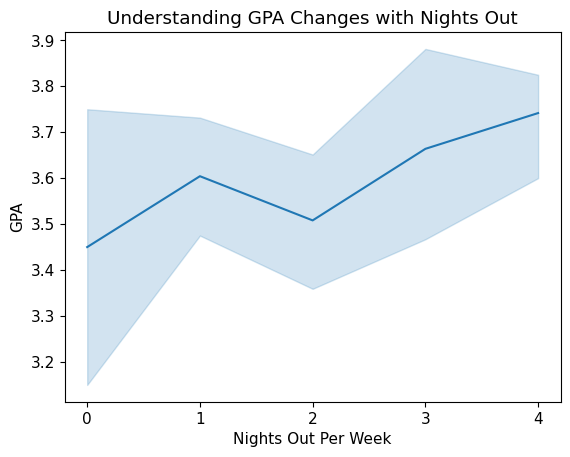

In [159]:
sns.lineplot(data=df, x='nights_out_per_week', y='gpa')
plt.xticks(range(5))
plt.xlabel('Nights Out Per Week')
plt.ylabel('GPA')
plt.title('Understanding GPA Changes with Nights Out')

This line plot illustrates the relationship between nights out per week and GPA. Surprisingly, It shows that as the number of nights out per week increases, GPA generally increases as well. However, an interesting observation is a slight decrease in GPA when transitioning from 1 to 2 nights per week. Besides that, Duke students generally tend to have a higher GPA as they go out more frequently during the week.

### Sleep Habits

According to the [National Heart, Lung, and Blood Institute](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep#:~:text=Experts%20recommend%20that%20adults%20sleep,or%20more%20hours%20a%20night), adults should be getting at least 7 hours of sleep at night.

Text(0.5, 1.0, 'Distribution of Student Sleep Hours')

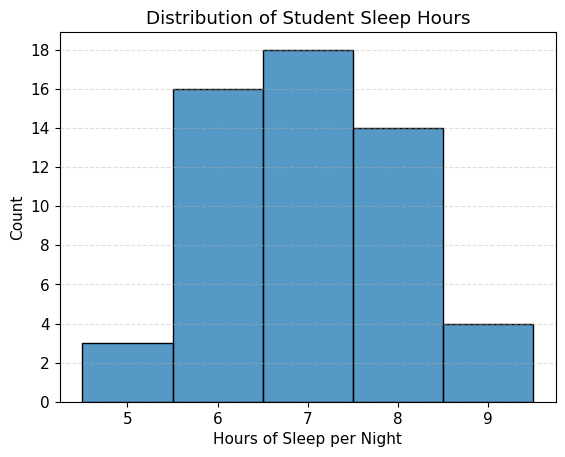

In [160]:
sns.histplot(data = df, x='sleep_per_night', bins=range(5,11))
custom_xticks = [0.5 + i for i in range(5,10)]
plt.xticks(custom_xticks,range(5,10))
plt.yticks(range(0, 20, 2))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xlabel('Hours of Sleep per Night')
plt.title('Distribution of Student Sleep Hours')

Out of the 55 surveyed students, 36 reported getting the recommended minimum 7 hours of sleep, while 19 students indicated that they don't get enough sleep.

Text(0.5, 1.0, 'Exploring The Relationship Between Hours of Sleep and GPA')

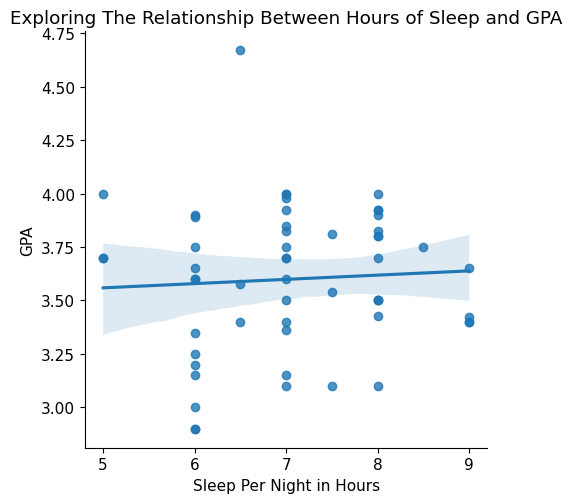

In [161]:
sns.lmplot(data=df, x='sleep_per_night', y='gpa')
plt.xlabel('Sleep Per Night in Hours')
plt.ylabel('GPA')
plt.title('Exploring The Relationship Between Hours of Sleep and GPA')

With the exception of one student, all students were able to maintain a GPA above or equal to 3.0, regardless of the amount of sleep they got per night. The regression line shows a slight positive trend suggesting the more sleep per night, the higher their GPA. The confidence interval narrows around 7 hours of sleep, indicating higher certainty in this range compared to the rest of the regression line.

### The Dilemma Visualization

Text(0.5, 1.0, 'Visualizing GPA, Social Life, and Sleep Habits')

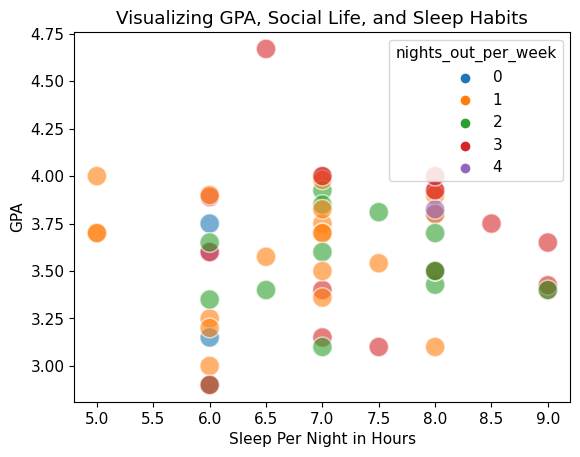

In [162]:
sns.scatterplot(data=df, x='sleep_per_night', y='gpa', s=200, alpha=.6, hue='nights_out_per_week', palette='tab10')
plt.xlabel('Sleep Per Night in Hours')
plt.ylabel('GPA')
plt.title('Visualizing GPA, Social Life, and Sleep Habits')

The above bubble chart shows nightly hours of sleep on the x-axis, GPA on the y-axis, and the color of the bubbles represent weekly nights out. A cluster of students gets 7 hours of sleep, with GPAs ranging from 3.25 to 4.0. Most of these students go out 1-2 nights per week. Another intriguing cluster is the one with 8 hours of sleep and a GPA ranging from 3.75 to 4.0. This small cluster contains a wider range of weekly nights out from 1-4 nights.

## Storytelling

In summary, I wanted to explore how the sleep, social life, and GPA habits affect one another. I was able to find trends that weren't too surprising, such as a positive regression between sleep and GPA, and trends that were pretty surprising, such as a consistent increase in GPA as students have more weekly nights out. I was personally surprised to see that the majority of students actually get the minimum recommended amount of sleep. As a college student surrounded by other students, it's hard to find people who get at least 7 hours of sleep consistently. All in all, it seems that this population at Duke can maintain a balance between grades, sleep, and a social life.

## Impact

The positive trend shown in the relationship between social life and GPA may cause some harm, as going out every night does not guarantee a higher GPA. With only 55 students, this small sample may contain inaccuracies. This could be mitigated by including additional data, such as whether students work and their weekly working hours, as well as distinguishing between undergraduate and graduate students. Also, Duke is a prestigous university that selects top candidates, so their students are generally more responsible and disciplined. Exploring these habits may vary by university, especially ones with a strong party culture.

## References

- [Dataset on Kaggle](https://www.kaggle.com/datasets/joebeachcapital/duke-students-gpa)
- [Dataset on OpenIntro](https://www.openintro.org/data/index.php?data=gpa)
- [National Heart, Lung, and Blood Institute](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep#:~:text=Experts%20recommend%20that%20adults%20sleep,or%20more%20hours%20a%20night.)